In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import copy
import os
import glob
import pylab as pl
import numpy as np
import matplotlib.animation as animation
import types
from mpl_toolkits.basemap import cm,addcyclic,Basemap, shiftgrid
% matplotlib inline

In [2]:
nc_filename=glob.glob('/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myANHA/EXP00/mesh_files/*rm1*')
print("found *.nc file: \n{}".format(nc_filename))

found *.nc file: 
['/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myANHA/EXP00/mesh_files/mesh_mask_rm1Canada.nc']


In [3]:
grid=nc.Dataset(nc_filename[0])

In [11]:
nav_lon=grid.variables['nav_lon'][:]
nav_lat=grid.variables['nav_lat'][:]
mbathy=grid.variables['mbathy'][:]
tmask=grid.variables['tmask'][:]
umask=grid.variables['umask'][:]
vmask=grid.variables['vmask'][:]
fmask=grid.variables['fmask'][:]
fse3t=grid.variables['e3t'][:]
print nav_lon.shape
print mbathy.shape
print fse3t.shape
print tmask.shape

(800, 544)
(1, 800, 544)
(1, 50, 800, 544)
(1, 50, 800, 544)


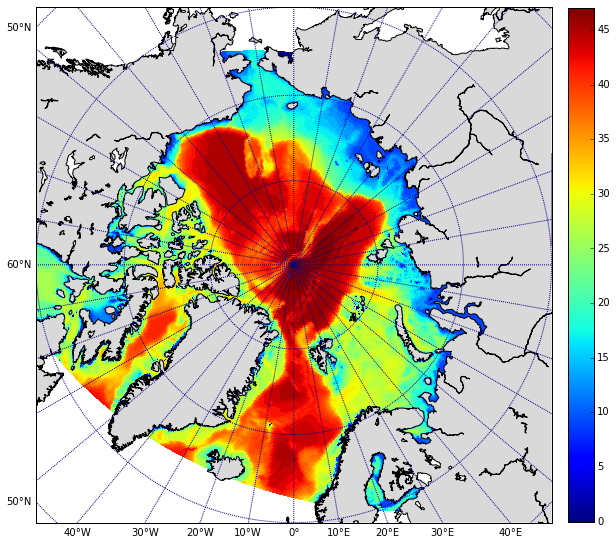

In [17]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()
m = Basemap(projection='npstere',boundinglat=60,lon_0=0,resolution='l',round=False)
m.drawcoastlines()
m.fillcontinents(color = '0.85')
m.drawparallels(np.arange(-80.,90.,10.),labels=[1, 0, 0, 0],color='darkblue',latmax=90)
m.drawmeridians(np.arange(-180.,180.,10.),labels=[0, 0, 0, 1],color='darkblue',latmax=90)
x_lon, y_lat = m(nav_lon, nav_lat)
#m.plot(x_lon,y_lat,x_lon.T,y_lat.T,color='black',linewidth=0.3)
m = m.pcolor(x_lon[400:-1,:],y_lat[400:-1,:],mbathy[0,400:-1,:])
plt.colorbar(fraction=0.046,pad=0.03)
#plt.clabel(m, fontsize=10, inline=1,fmt = '%1.0f')
plt.show()

In [12]:
tmask2=copy.copy(tmask)
mbathy2=copy.copy(mbathy)
for i in range (400,len(nav_lon[:,0])):
    for j in range (len(nav_lon[0,:])):
        if fse3t[0,mbathy[0,i,j],i,j]<100:
            tmask2[0,mbathy[0,i,j],i,j]=0
            mbathy2[0,i,j]=mbathy[0,i,j]-1

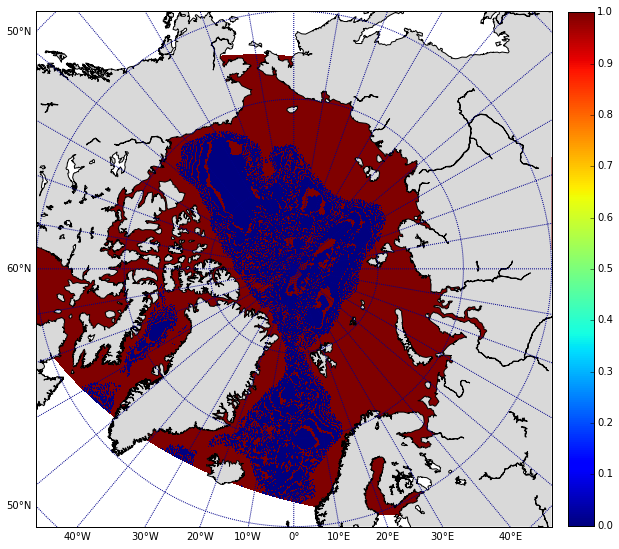

In [18]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()
m = Basemap(projection='npstere',boundinglat=60,lon_0=0,resolution='l',round=False)
m.drawcoastlines()
m.fillcontinents(color = '0.85')
m.drawparallels(np.arange(-80.,90.,10.),labels=[1, 0, 0, 0],color='darkblue',latmax=90)
m.drawmeridians(np.arange(-180.,180.,10.),labels=[0, 0, 0, 1],color='darkblue',latmax=90)
x_lon, y_lat = m(nav_lon, nav_lat)
m = m.pcolor(x_lon[400:-1,:],y_lat[400:-1,:],mbathy[0,400:-1,:]-mbathy2[0,400:-1,:])
plt.colorbar(fraction=0.046,pad=0.03)
plt.show()

In [13]:
#magic function to copy nc file!!!!

from netCDF4 import Dataset

#input file
dsin = Dataset("/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myANHA/EXP00/mesh_files/mesh_mask_rm1Canada.nc")
#remove old file if it exists
#os.remove("crop.nc")
#output file
dsout = Dataset("/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myANHA/EXP00/crop.nc", "w")

#Copy dimensions
for dname, the_dim in dsin.dimensions.iteritems():
    #print dname, len(the_dim)
    dsout.createDimension(dname, len(the_dim) if not the_dim.isunlimited() else None)


# Copy variables
for v_name, varin in dsin.variables.iteritems():
    outVar = dsout.createVariable(v_name, varin.datatype, varin.dimensions)
        
    # Copy variable attributes
    outVar.setncatts({k: varin.getncattr(k) for k in varin.ncattrs()})
    if v_name=='mbathy':
        outVar[:] = mbathy2[:]
        print 'hi, my new bathy'
    elif v_name=='tmask':
        outVar[:] = tmask2[:]
        print 'hi, my new tmask'
    else:
        outVar[:] = varin[:]
    
# close the output file
dsout.close()

hi, my new tmask
hi, my new bathy


In [19]:
#test my magic function
gridnew=nc.Dataset("/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myANHA/EXP00/crop.nc")
nav_lon=gridnew.variables['nav_lon'][:]
nav_lat=gridnew.variables['nav_lat'][:]
bathynew=gridnew.variables['mbathy'][:]
fmasknew=gridnew.variables['fmask'][:]

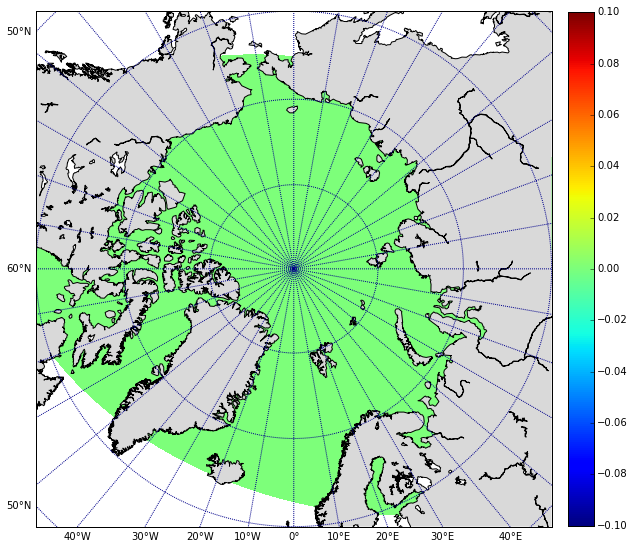

In [20]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()
m = Basemap(projection='npstere',boundinglat=60,lon_0=0,resolution='l',round=False)
m.drawcoastlines()
m.fillcontinents(color = '0.85')
m.drawparallels(np.arange(-80.,90.,10.),labels=[1, 0, 0, 0],color='darkblue',latmax=90)
m.drawmeridians(np.arange(-180.,180.,10.),labels=[0, 0, 0, 1],color='darkblue',latmax=90)
x_lon, y_lat = m(nav_lon, nav_lat)
m = m.pcolor(x_lon[400:-1,:],y_lat[400:-1,:],bathynew[0,400:-1,:]-mbathy2[0,400:-1,:])
plt.colorbar(fraction=0.046,pad=0.03)
plt.show()